In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('hotel_bookings.csv')

## Show the first 5 rows of Data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df = data.copy()

In [4]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [8]:
df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [9]:
df.fillna({'country':data.country.mode().to_string()}, inplace=True)


## for missing children value, replace it with rounded mean value
df.fillna({'children': round(data.children.mean())}, inplace=True)

In [10]:
df.isnull().sum().sort_values(ascending=False)[:10]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
company                        0
agent                          0
dtype: int64

In [11]:
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [12]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [13]:
x,y = get_count(df['is_canceled'])

In [14]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x=x,y=y, ax = ax)
    elif type == 'line':
        sns.lineplot(x=x,y=y, ax = ax, sort=False)
        
    
    plt.show()

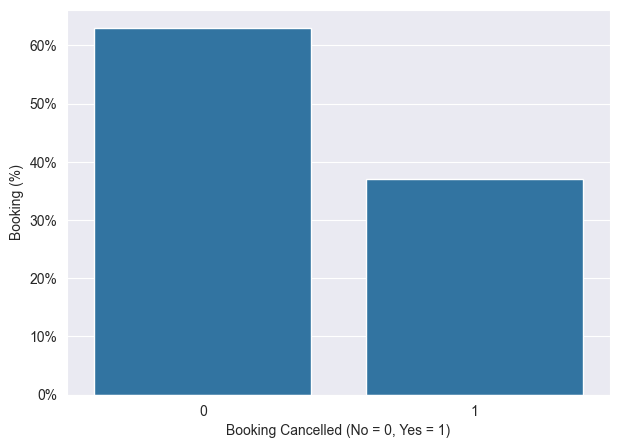

In [15]:
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

In [16]:
df_not_canceled = df[df['is_canceled'] == 0]

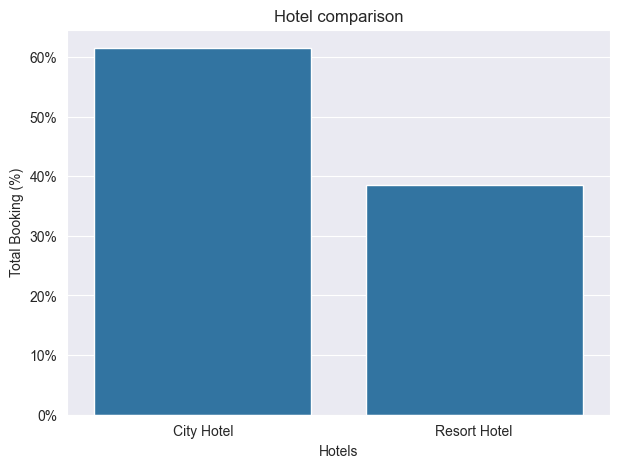

In [17]:
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

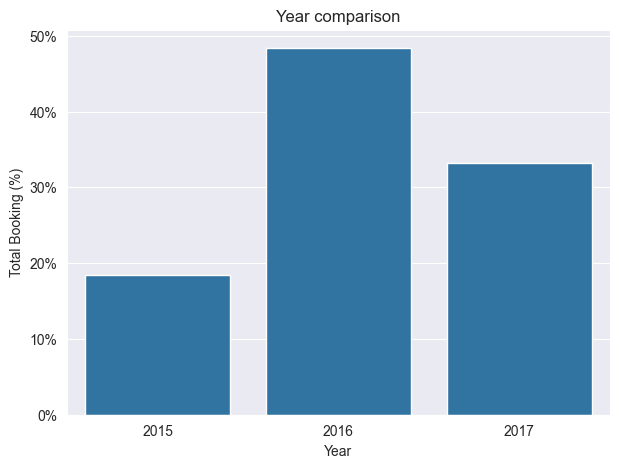

In [18]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

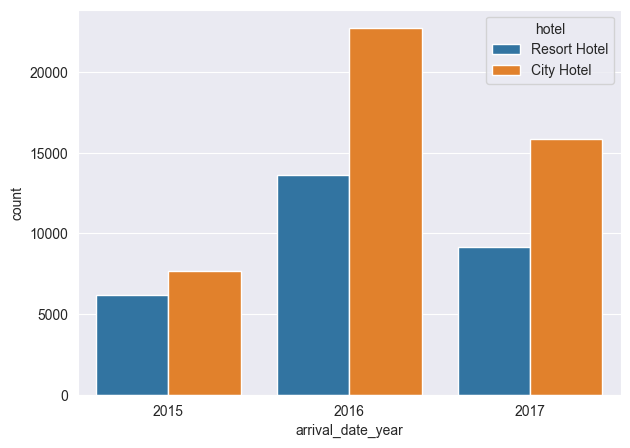

In [19]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

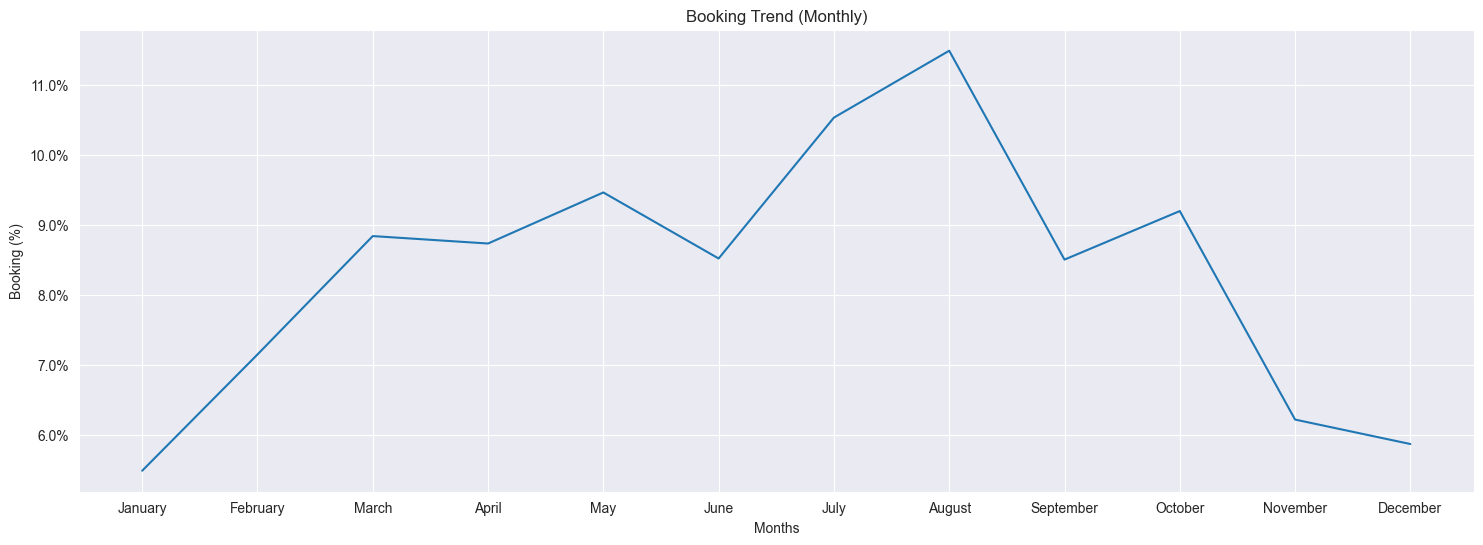

In [20]:

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

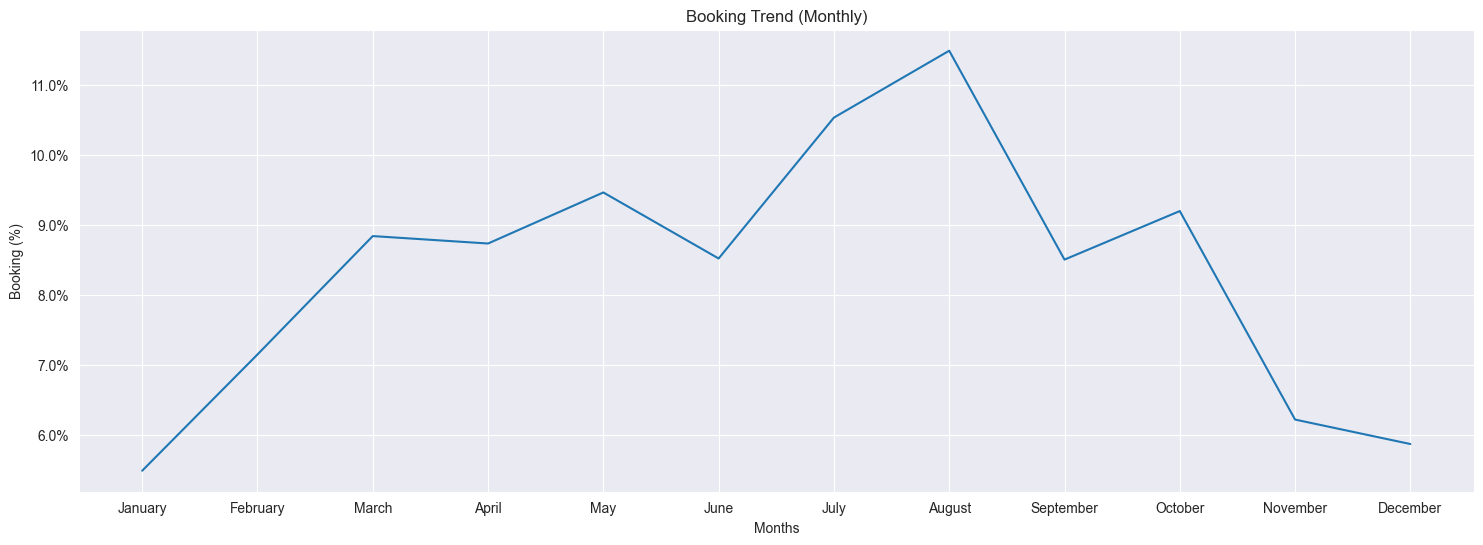

In [21]:

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

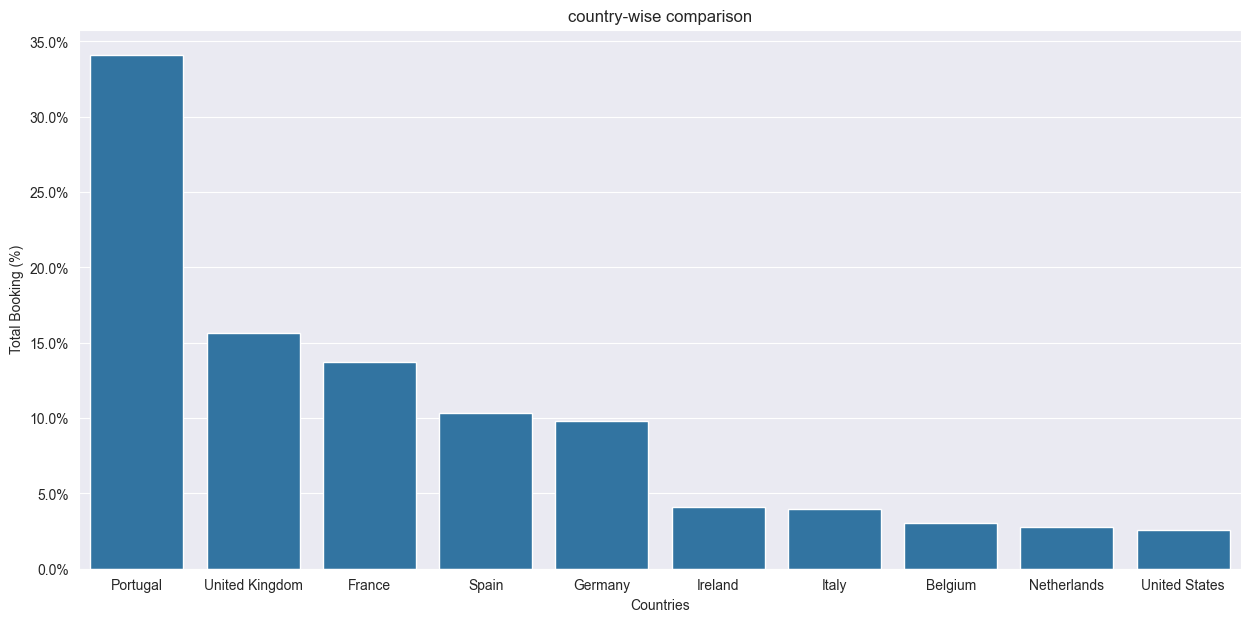

In [22]:

import pycountry as pc

x,y = get_count(df_not_canceled['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))

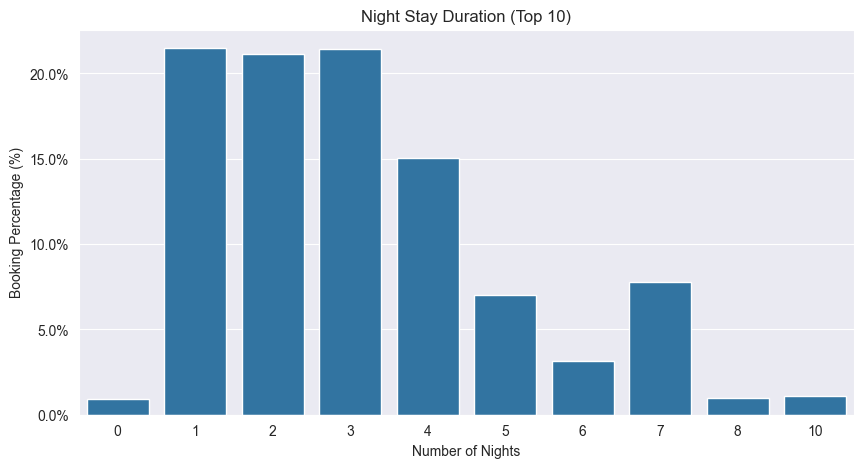

In [23]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))


C:\Users\AKASH\AppData\Local\Temp\ipykernel_17992\3123020310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']


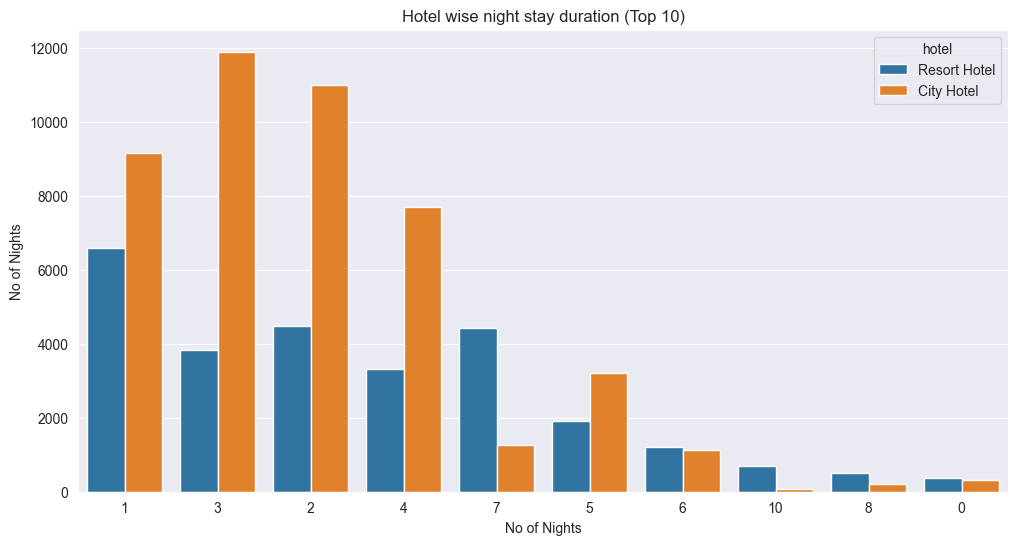

In [24]:

df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

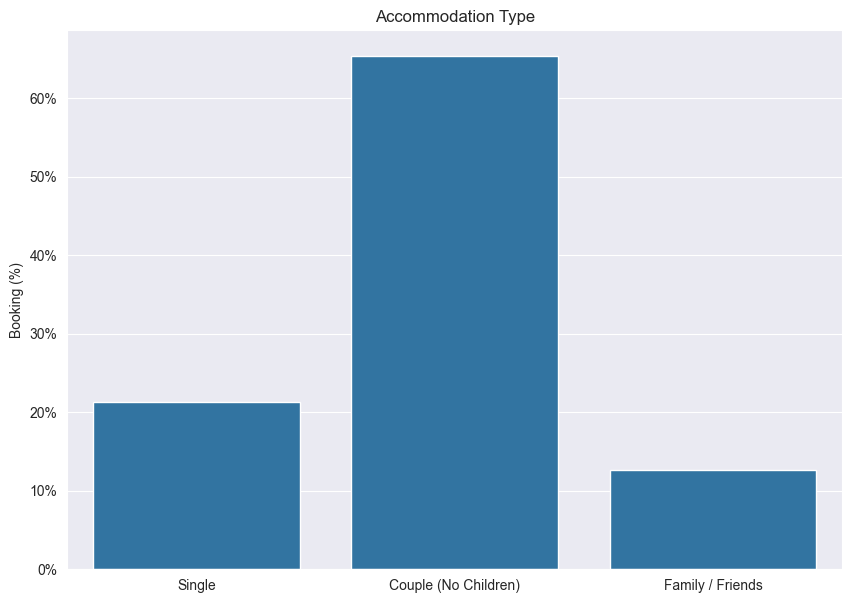

In [25]:

## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

In [26]:
## Copy the dataframe
df_subset = df.copy()

In [27]:

## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1


## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [28]:

## Remove the less important features
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)

In [29]:
df_subset = df_subset.drop(['reservation_status'], axis=1)

In [30]:
df_subset.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Room,net_cancelled
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,Direct,Direct,0,3,No Deposit,0,0,0,Transient,0.0,0,0,1,0
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,Direct,Direct,0,4,No Deposit,0,0,0,Transient,0.0,0,0,1,0
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,No Deposit,0,0,0,Transient,75.0,0,0,0,0
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,No Deposit,304,0,0,Transient,75.0,0,0,1,0
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,No Deposit,240,0,0,Transient,98.0,0,1,1,0


In [31]:
df_subset["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

<Axes: xlabel='meal', ylabel='count'>

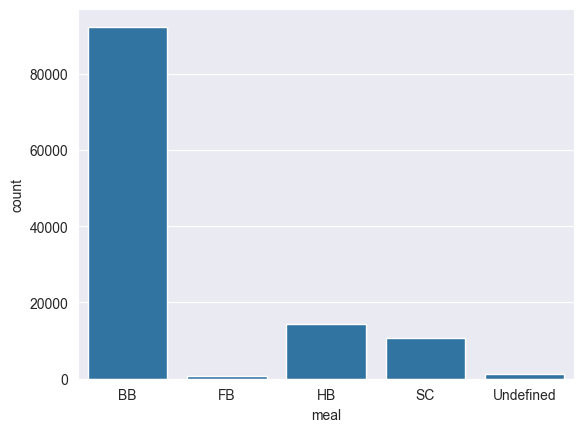

In [32]:
sns.countplot(x="meal",data=df_subset)

In [33]:
meal=df_subset['meal'].unique()
for index, row in df_subset.iterrows():
    i=0
    while row["meal"]!=meal[i] :
        i+=1
    df_subset.at[index, 'meal'] = i

In [34]:
df_subset["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', '0    PRT', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'K

<Axes: xlabel='country', ylabel='count'>

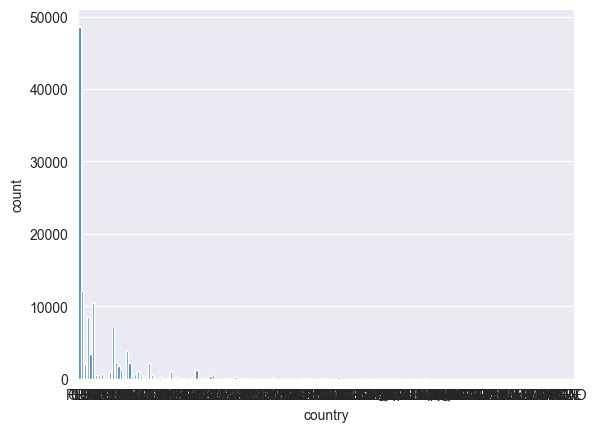

In [35]:
sns.countplot(x="country",data=df_subset)

In [36]:
country=df_subset['country'].unique()
for index, row in df_subset.iterrows():
    i=0
    while row["country"]!=country[i] :
        i+=1
    df_subset.at[index, 'country'] = i

In [37]:
df_subset["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

<Axes: xlabel='market_segment', ylabel='count'>

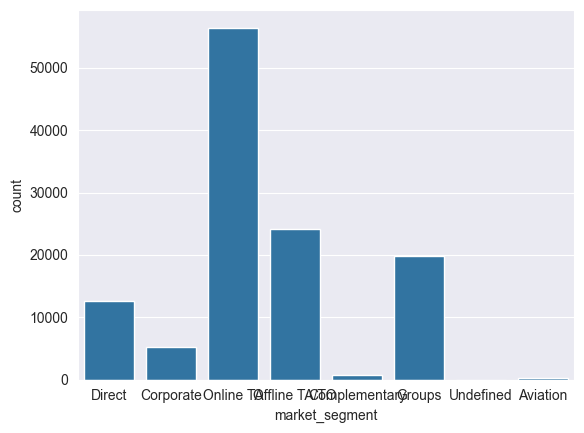

In [38]:
sns.countplot(x="market_segment",data=df_subset)

In [39]:
market_segment=df_subset['market_segment'].unique()
for index, row in df_subset.iterrows():
    i=0
    while row["market_segment"]!=market_segment[i] :
        i+=1
    df_subset.at[index, 'market_segment'] = i

In [40]:
df_subset["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

<Axes: xlabel='distribution_channel', ylabel='count'>

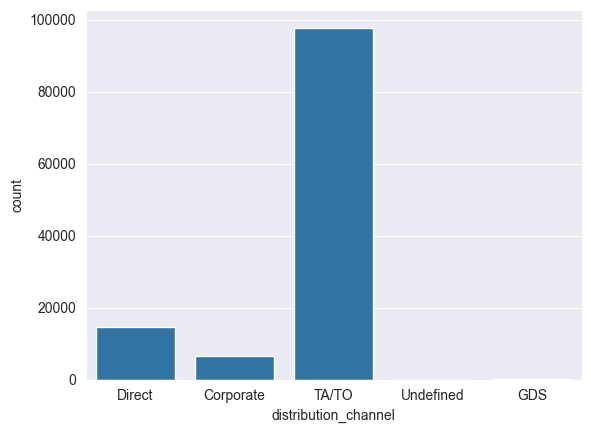

In [41]:
sns.countplot(x="distribution_channel",data=df_subset)

In [42]:
distribution_channel=df_subset['distribution_channel'].unique()
for index, row in df_subset.iterrows():
    i=0
    while row["distribution_channel"]!=distribution_channel[i] :
        i+=1
    df_subset.at[index, 'distribution_channel'] = i

In [43]:
df_subset["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

<Axes: xlabel='deposit_type', ylabel='count'>

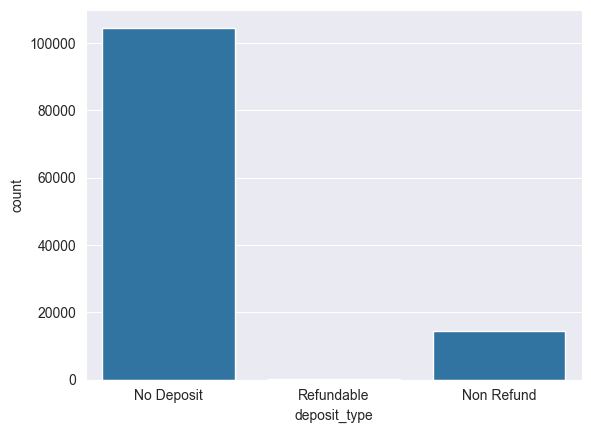

In [44]:
sns.countplot(x="deposit_type",data=df_subset)

In [45]:
deposit_type=df_subset['deposit_type'].unique()
for index, row in df_subset.iterrows():
    i=0
    while row["deposit_type"]!=deposit_type[i] :
        i+=1
    df_subset.at[index, 'deposit_type'] = i

In [46]:
df_subset["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

<Axes: xlabel='customer_type', ylabel='count'>

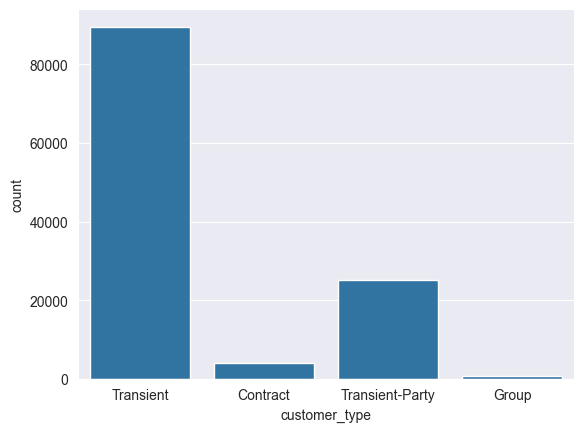

In [47]:
sns.countplot(x="customer_type",data=df_subset)

In [48]:
customer_type=df_subset['customer_type'].unique()
for index, row in df_subset.iterrows():
    i=0
    while row["customer_type"]!=customer_type[i] :
        i+=1
    df_subset.at[index, 'customer_type'] = i

In [49]:
df_subset["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

<Axes: xlabel='hotel', ylabel='count'>

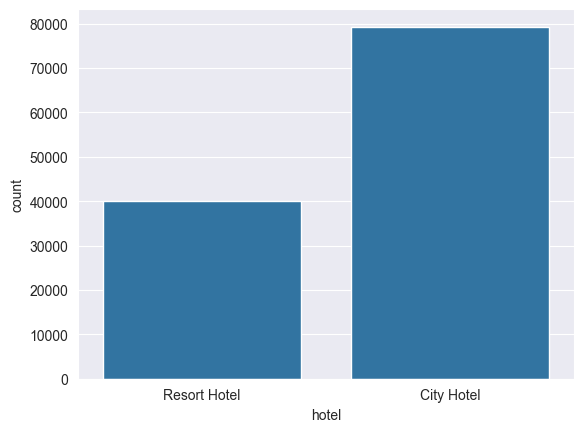

In [50]:
sns.countplot(x="hotel",data=df_subset)

In [51]:
hotel=df_subset['hotel'].unique()
for index, row in df_subset.iterrows():
    i=0
    while row["hotel"]!=hotel[i] :
        i+=1
    df_subset.at[index, 'hotel'] = i

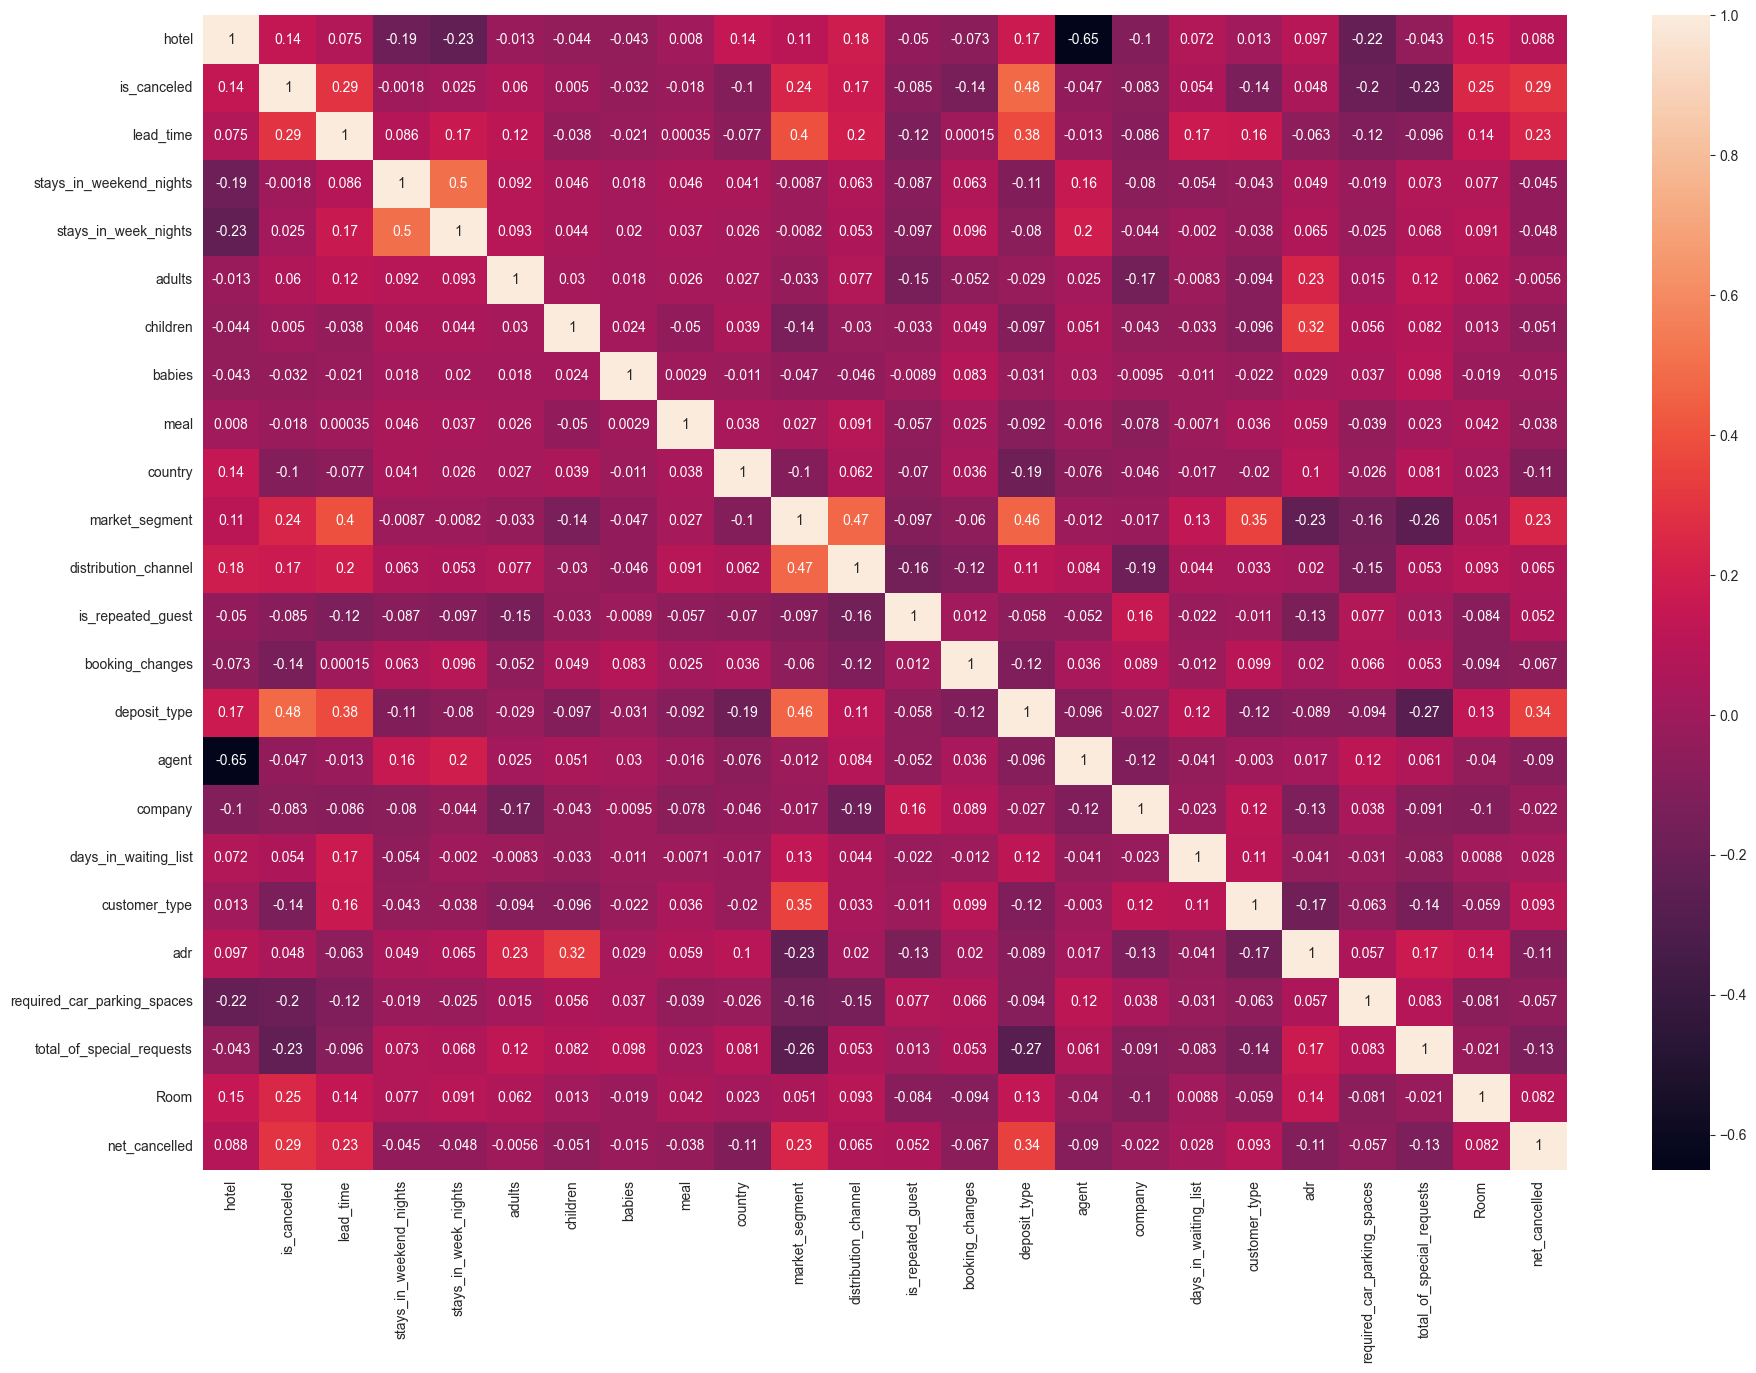

In [52]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

In [53]:
def transform(dataframe):
    
    
    ## Import LabelEncoder from sklearn
    from sklearn.preprocessing import LabelEncoder
    
    le = LabelEncoder()
    
    
    ## Select all categorcial features
    categorical_features = list(dataframe.columns[dataframe.dtypes == object])
    
    
    ## Apply Label Encoding on all categorical features
    return dataframe[categorical_features].apply(lambda x: le.fit_transform(x))

df = transform(df)

In [54]:

def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)
    
    return x_train, x_test, y_train, y_test



x_train, x_test, y_train, y_test = data_split(df_subset, 'is_canceled')

In [55]:
def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf


clf = train(x_train, y_train)

In [56]:
def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_train,y_train)

Training Accuracy of our model is: 0.995532822586049
Test Accuracy of our model is: 0.995532822586049


In [57]:
prediction = clf.predict(x_train.iloc[10].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[10]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 0
Actual Value		: 0


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
